# Health Survey Data Analysis

Mark Prettyman

## Executive Summary

Today we will be describing using statistical analysis whether respondents in New York reported ill health on a certain number of days following a hospital visit. We are trying to determine whehter the fact that these respondents rent or own their home affects the chance they will report ill health.

## The Data

This project uses health data from the CDC Behavioral Risk Factor Surveillance System (BRFSS). Specifically this subset of the data represents survey responses from the 2020-2021 survey in the state of New York. Each record represents a survey response.

'PHYSHLTH' column represents the number of days respondents recorded feeling unwell after a visit.
'RENTHOM1' column represents whether the respondent rents or owns their home.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [3]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA',
       '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'],
      dtype='object', length=279)

In [4]:
# THIS CELL IS BLANK

In [5]:
df['PHYSHLTH'].value_counts()

88.0    10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
77.0      248
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
99.0       81
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [6]:
df['RENTHOM1'].value_counts()

1.0    8587
2.0    5370
3.0     608
9.0     147
7.0      57
Name: RENTHOM1, dtype: int64

## Data Preparation

Here we will begin by splicing data, selecting the columns we need out of the DataFrame, dropping rows contanining values that are irrelevant, and checking to see we have spliced what we need.

In [7]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88, 0, regex=True)
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
77.0      248
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
99.0       81
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [8]:
values = [77, 99]

In [9]:
df = df[df.PHYSHLTH.isin(values) == False]
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [10]:
df['PHYSHLTH'] = df['PHYSHLTH'].dropna()
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

<AxesSubplot:>

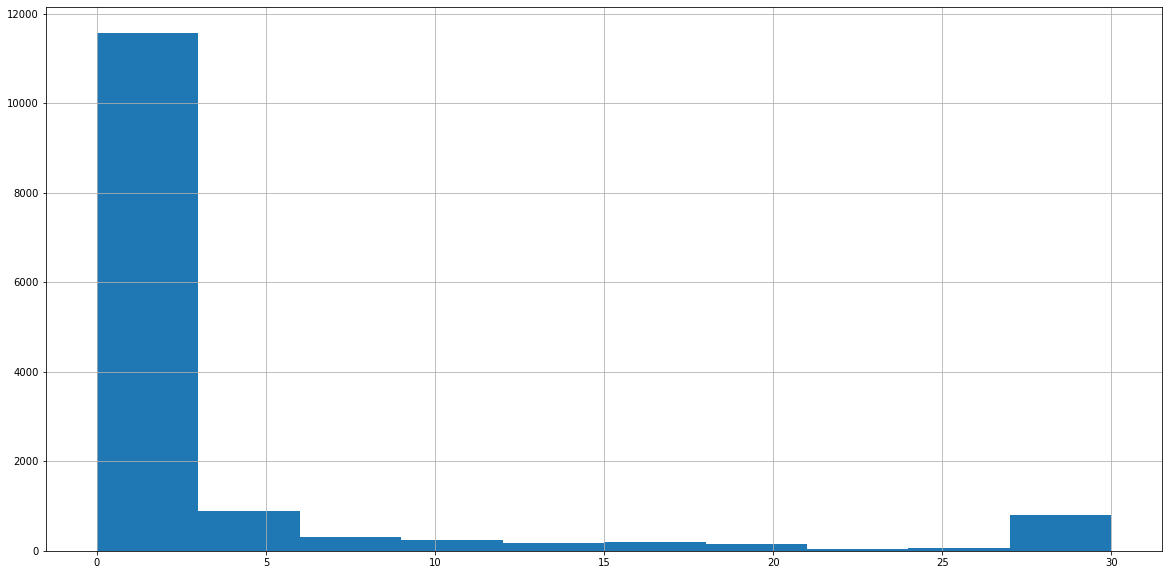

In [11]:
df['PHYSHLTH'].hist(figsize=(20,10))

In [12]:
df['PHYSHLTH'].describe()

count    14440.000000
mean         3.083795
std          7.592715
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [13]:
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
3.0     585
9.0     141
7.0      55
Name: RENTHOM1, dtype: int64

In [14]:
values_2 = [3, 9, 7]

In [15]:
df = df[df.RENTHOM1.isin(values_2) == False]
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [16]:
df.shape

(13659, 279)

In [17]:
# THIS CELL IS BLANK

In [18]:
# THIS CELL IS BLANK

In [19]:
# THIS CELL IS BLANK

## Confidence Interval for Mean of `PHYSHLTH`

In [20]:
physhlth_list = df['PHYSHLTH'].tolist()

In [21]:
stats.t.interval(alpha=0.95, 
                 df=len(physhlth_list)-1, 
                 loc=np.mean(physhlth_list), 
                 scale=stats.sem(physhlth_list)
                )

(2.9374942974789744, 3.1917977443981758)

The 95% confidence interval for the number of days New Yorkers that expiernced ill health is between 2.9374942974789744 and 3.1917977443981758. 

You can be 95% confident that the true population mean of New Yorkers fall within the given range.

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

Were going to use a filter function to select only the columns being analyzed, then separate them into different, new DataFrames to generate our samples.

In [22]:
df_compare = df.filter(['PHYSHLTH','RENTHOM1'], 
                       axis=1
                      )

In [23]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13659 entries, 0 to 14767
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  13659 non-null  float64
 1   RENTHOM1  13659 non-null  float64
dtypes: float64(2)
memory usage: 320.1 KB


In [24]:
df_compare = df_compare.set_index('RENTHOM1')

In [25]:
df_compare = df_compare.reset_index()

In [26]:
# THIS CELL IS BLANK

In [27]:
import seaborn as sns

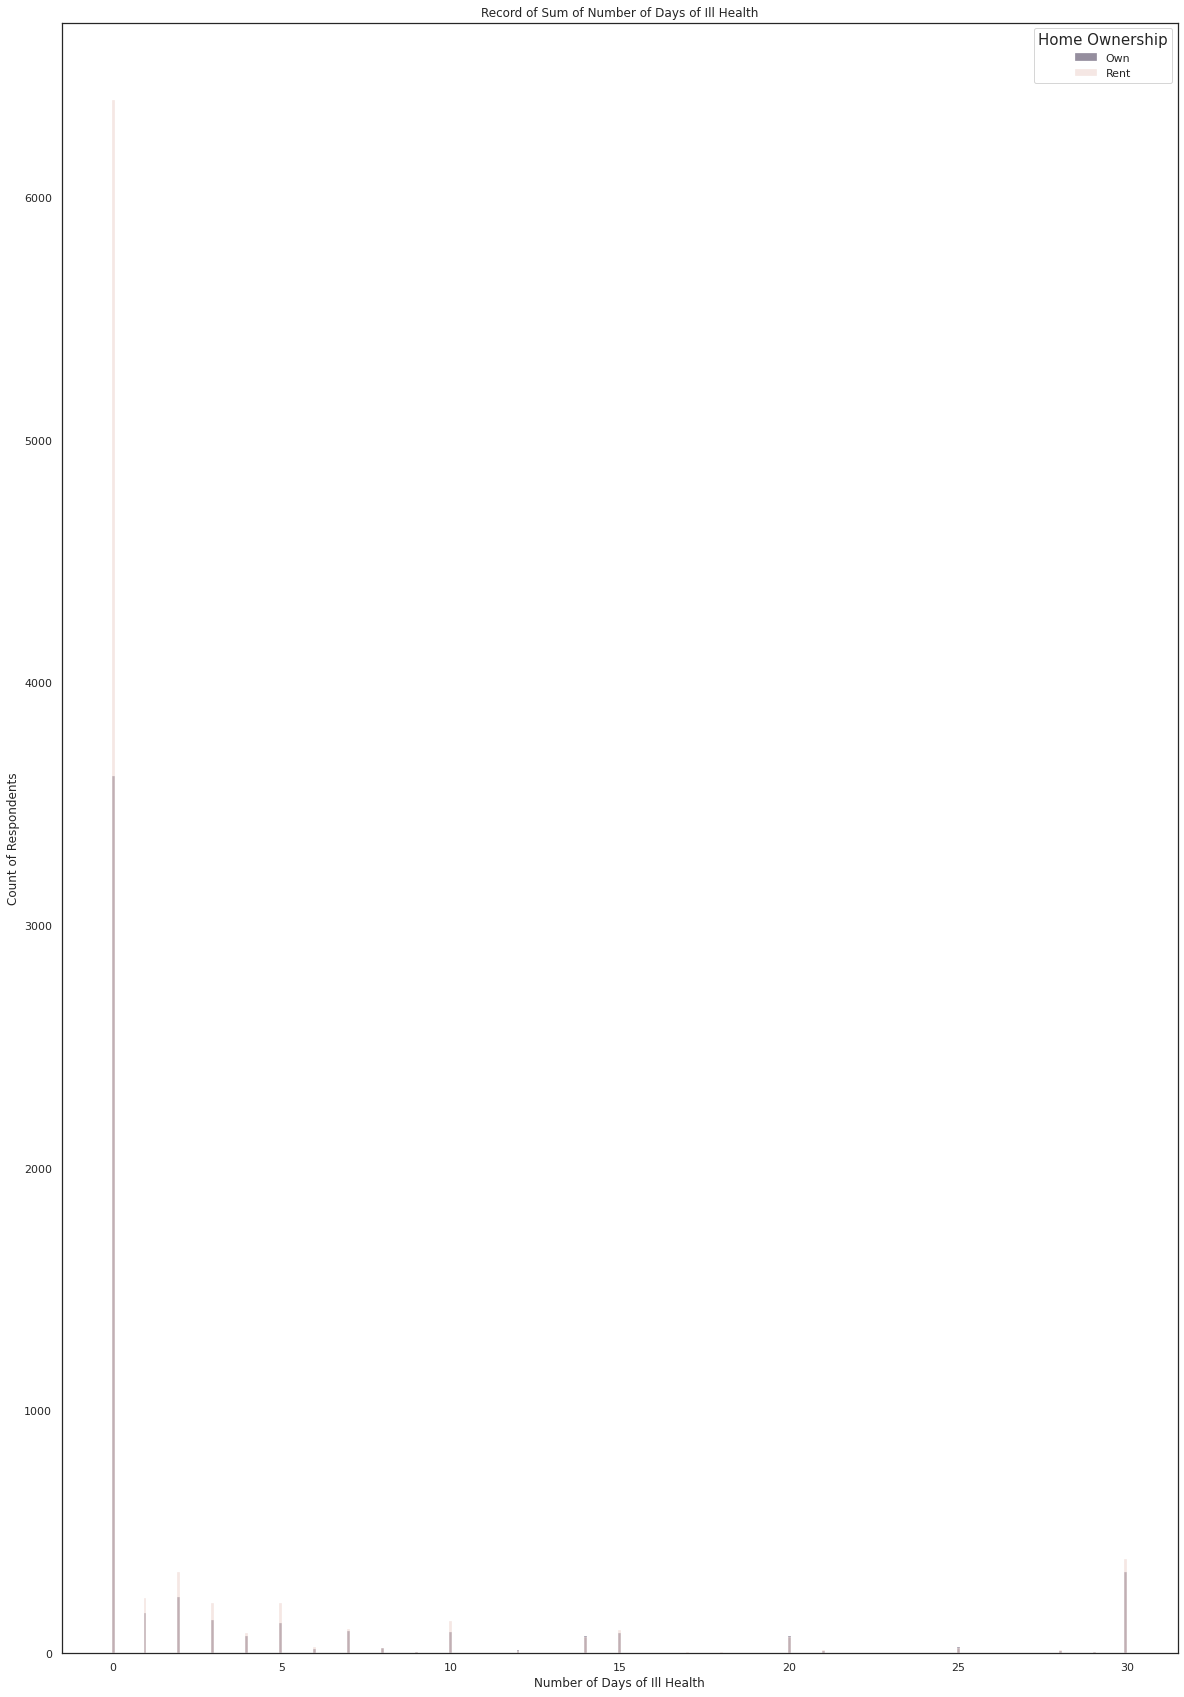

In [28]:
plt.figure(figsize=(20, 30))
sns.set_theme(style="white")

sns.histplot(data=df_compare, 
             x="PHYSHLTH", 
             hue='RENTHOM1'
            )

plt.xlabel('Number of Days of Ill Health')
plt.ylabel('Count of Respondents')
plt.title('Record of Sum of Number of Days of Ill Health')
plt.legend(['Own','Rent'], 
           title = "Home Ownership", 
           title_fontsize = 15
          )

plt.show()

It seems like the majority of respondents to the survey experienced ill health up to 3 days following the visit. 

The majority of the respondents own their home, rather than rent.

### Is the Difference Statistically Significant?

Here we will determine our null and alternative hypotheses:

𝐻0 : There is no difference between whether a respondent rents their home or owns it and how many days of ill health they experience.

𝐻1 : There is a difference between between whether a respondent rents their home or owns it and how many days of ill health they experience.

Then..

We will be using a two tailed t-test to determine the statistical difference between the distributions.

In [29]:
# We will first be splicing the feature into two separate DataFrames so we may run 
# the mathematical calculations

In [30]:
df_rent = df_compare.loc[df_compare['RENTHOM1'] == 1]
df_own = df_compare.loc[df_compare['RENTHOM1'] == 2]

In [31]:
df_rent = df_rent.set_index('RENTHOM1')
df_own = df_own.set_index('RENTHOM1')

In [32]:
df_rent.head()

,PHYSHLTH
RENTHOM1,
1.0,14.0
1.0,0.0
1.0,0.0
1.0,0.0
1.0,0.0


In [33]:
# In this block we pull a sample from the populations in the DataFrames
rent_sample = df_rent.sample(n=250, random_state=42)
own_sample = df_own.sample(n=250, random_state=42)

In [34]:
# We present the variance calculated for each sample
print("Variance of rent sample: ", rent_sample.var())
print("Variance of own sample: ", own_sample.var())

Variance of rent sample:  PHYSHLTH    61.843149
dtype: float64
Variance of own sample:  PHYSHLTH    64.049542
dtype: float64


In [35]:
# the t-test itself
results = stats.ttest_ind(rent_sample, own_sample, equal_var=False)
results

Ttest_indResult(statistic=array([-0.86806143]), pvalue=array([0.38577894]))

In [36]:
# Presenting the p-value
p_val = results[1]
print("The p-value is:", p_val)

The p-value is: [0.38577894]


Since the given p-value is greater than the alpha (significance level) of 0.05, we fail to reject the null hypothesis.

## Further Investigation

The next column the PHYSHLTH columns should be tested against is the MENTHLTH column, specifyiong the number of days respondents were feeling unwell. Due to the recent scientific consensus based on recent research, it would be important to continue to analyze how mental health affects physical health, if there is a measurable effect at all.

In [37]:
# THIS CELL IS BLANK

In [38]:
# THIS CELL IS BLANK

In [39]:
# THIS CELL IS BLANK